<a href="https://colab.research.google.com/github/danramirez11/ASAP/blob/main/Analysis/ASAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASAP GAME 🧠
## Análisis de datos

#Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQMHbZg_QP-LEL892dqSWuRoMqf8p39aVR9sZsB87E-YaC75Z2_FCVH9KOQrPZJzsdRLwtMlMse79gx/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header = 2, decimal=",")

df.columns = df.columns.str.lower().str.replace(" ", "_")

df["tasa_exito_individual"] = df["retos_individuales_ganados"] / df["retos_individuales_jugados"]
df["tasa_exito_grupal"] = df["retos_grupales_ganados"] / df["retos_grupales_jugados"]

numeric_df = df.select_dtypes(include=np.number)

#Datos generales (medias, medianas, mínimos, máximos, etc)

In [2]:
def estadisticas_basicas(df):

    stats = numeric_df.describe().T
    stats["mediana"] = numeric_df.median()
    stats["moda"] = numeric_df.mode().iloc[0]
    stats["desviacion_estandar"] = numeric_df.std()
    stats["coef_var"] = stats["std"] / stats["mean"]
    return stats

print("Estadísticas básicas:")
print(estadisticas_basicas(df))



Estadísticas básicas:
                                   count       mean        std   min  \
retos_individuales_jugados          24.0   3.000000   0.000000   3.0   
retos_individuales_ganados          24.0   1.375000   0.969648   0.0   
retos_grupales_jugados              24.0   3.000000   0.000000   3.0   
retos_grupales_ganados              24.0   1.500000   0.884652   0.0   
tiempo_promedio_retos_1v1           24.0  35.717917  11.834129   1.0   
tiempo_promedio_en_retos_grupales   24.0  24.832500   7.288884  14.0   
rondas_jugadas                      24.0   6.000000   0.000000   6.0   
esfuerzo_individual                 21.0   2.380952   0.864650   1.0   
satisfacción_individual             21.0   4.476190   0.813575   2.0   
esfuerzo_grupal                     21.0   2.428571   0.870140   1.0   
satisfacción_grupal                 21.0   4.333333   1.016530   1.0   
tasa_exito_individual               24.0   0.458333   0.323216   0.0   
tasa_exito_grupal                   24.0  

### Conclusiones

La dispersión de la tasa de éxito individual es mayor que la tasa grupal, lo que indica que hay más variabilidad en el desempeño de los jugadores en retos individuales.

#Tasas de Éxito individuales vs grupales

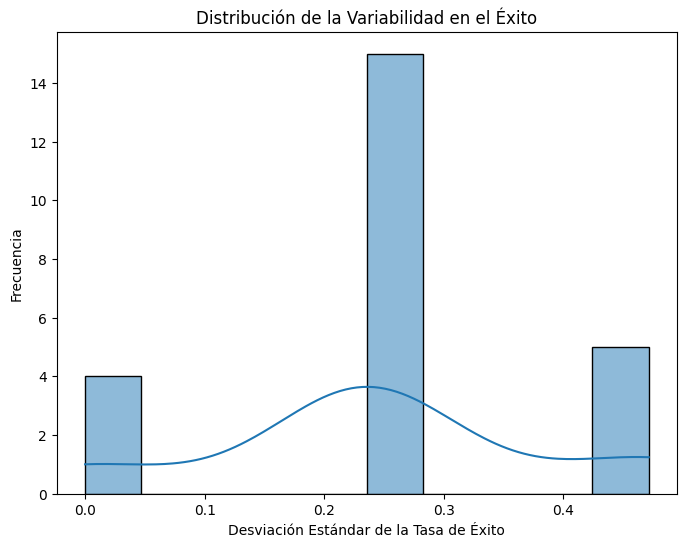

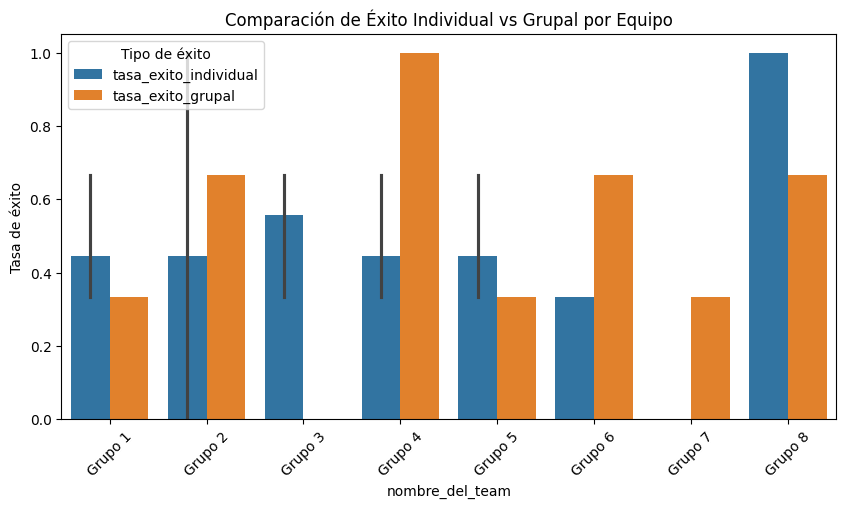

In [3]:
# Comparación de tasas de éxito entre equipos
plt.figure(figsize=(8, 6))
sns.histplot(df[['tasa_exito_individual', 'tasa_exito_grupal']].std(axis=1), bins=10, kde=True)
plt.title("Distribución de la Variabilidad en el Éxito")
plt.xlabel("Desviación Estándar de la Tasa de Éxito")
plt.ylabel("Frecuencia")
plt.show()

# Comparación entre tasa de éxito individual y grupal
df_melted = df.melt(id_vars=["nombre_del_team"],
                     value_vars=["tasa_exito_individual", "tasa_exito_grupal"],
                     var_name="Tipo de éxito", value_name="Tasa de éxito")

plt.figure(figsize=(10, 5))
sns.barplot(x="nombre_del_team", y="Tasa de éxito", hue="Tipo de éxito", data=df_melted)
plt.xticks(rotation=45)
plt.title("Comparación de Éxito Individual vs Grupal por Equipo")
plt.show()


### Conclusiones

La mayoría de participantes tienen una variabilidad media de éxito, lo que nos indica que el juego es equilibrado y tiene fluctuaciones esperadas en el éxito.

Todos los equipos son diferentes en sus estrategias de ganar. Algunos se desempeñan mejor en equipo, mientras que otros ganan más puntos en retos individuales.

#Tiempo promedio en retos individuales vs grupales

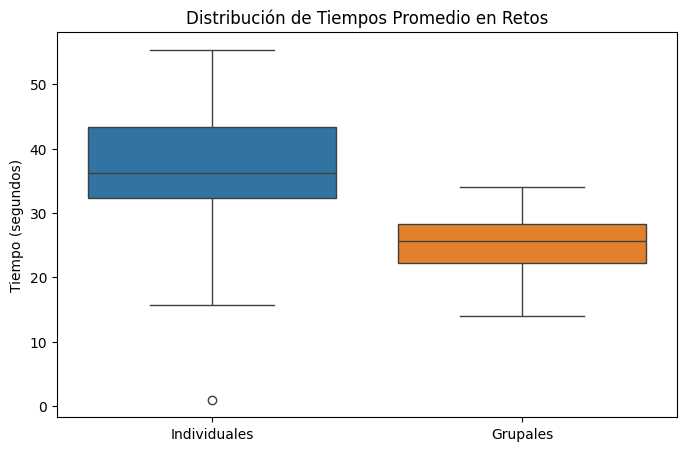

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['tiempo_promedio_retos_1v1', 'tiempo_promedio_en_retos_grupales']])
plt.xticks([0, 1], ['Individuales', 'Grupales'])
plt.title("Distribución de Tiempos Promedio en Retos")
plt.ylabel("Tiempo (segundos)")
plt.show()

### Conclusiones

Los retos individuales tuvieron una mayor duración en promedio y mostraron una mayor dispersión en los tiempos. En contraste, los retos grupales fueron más consistentes y con una menor duración. Esto no puede indicar que el trabajo en equipo ayuda a reducir el tiempo necesitado para completar un reto.

#Satisfacción grupal vs individual

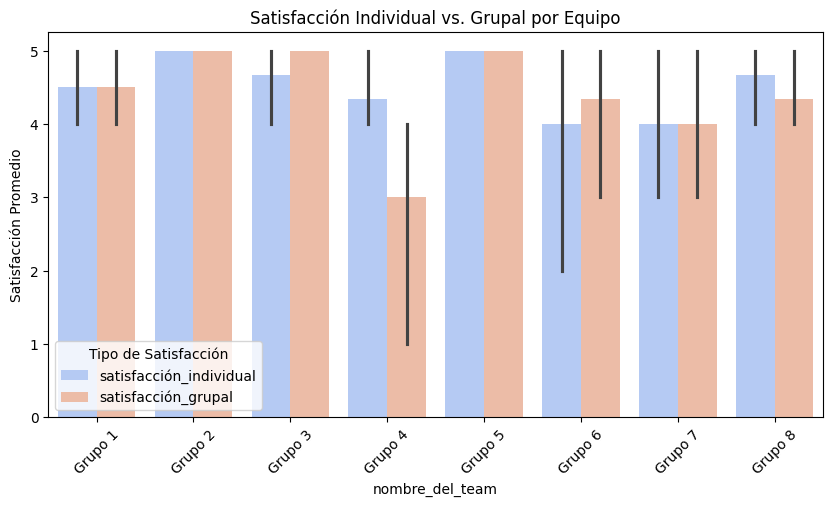

In [5]:

plt.figure(figsize=(10, 5))
df_melted = df.melt(id_vars=["nombre_del_team"], value_vars=["satisfacción_individual", "satisfacción_grupal"],
                     var_name="Tipo de Satisfacción", value_name="Valor")

sns.barplot(x="nombre_del_team", y="Valor", hue="Tipo de Satisfacción", data=df_melted, palette="coolwarm")

plt.title("Satisfacción Individual vs. Grupal por Equipo")
plt.ylabel("Satisfacción Promedio")
plt.xticks(rotation=45)  # Rotar nombres de equipos si son muchos
plt.legend(title="Tipo de Satisfacción")
plt.show()

### Conclusiones

La mayoría de equipos reportó niveles similares de satisfacción con los retos individuales y grupales. Sin embargo, la satisfacción de retos grupales tiene más variabilidad, lo que nos indica que la experiencia en grupo no fue igualmente positiva para todos.

#Esfuerzo y Satisfacción

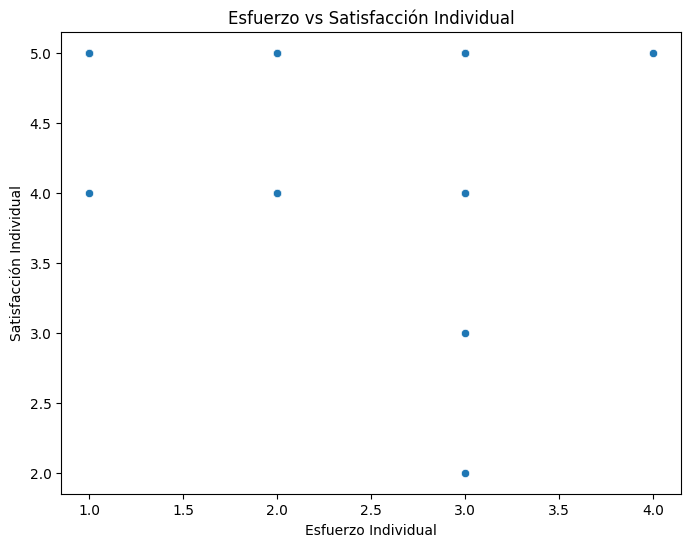

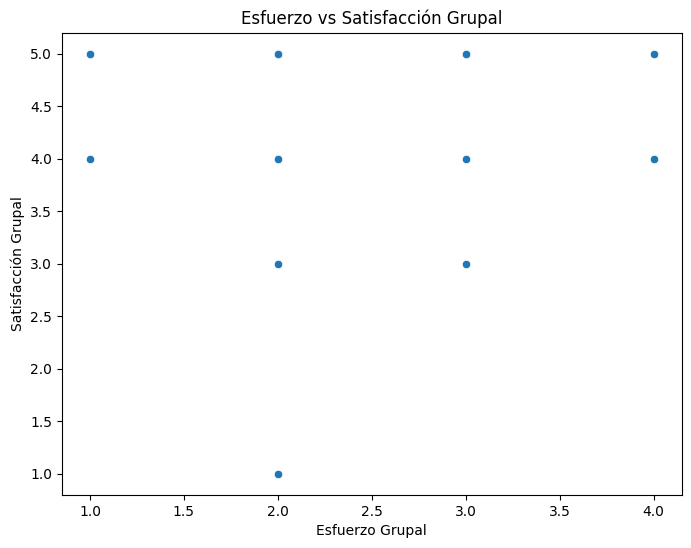

In [6]:
#Individual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["esfuerzo_individual"], y=df["satisfacción_individual"])
plt.title("Esfuerzo vs Satisfacción Individual")
plt.xlabel("Esfuerzo Individual")
plt.ylabel("Satisfacción Individual")
plt.show()

#Grupal
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["esfuerzo_grupal"], y=df["satisfacción_grupal"])
plt.title("Esfuerzo vs Satisfacción Grupal")
plt.xlabel("Esfuerzo Grupal")
plt.ylabel("Satisfacción Grupal")
plt.show()


### Conclusiones

Las gráficas son bastante dispersas y no parecen indicar correlaciones fuertes. La satisfacción de los retos grupales e individuales no se ve afectada por que tan difíciles percibieron los retos.

#Esfuerzo y Satisfacción vs Éxito individual

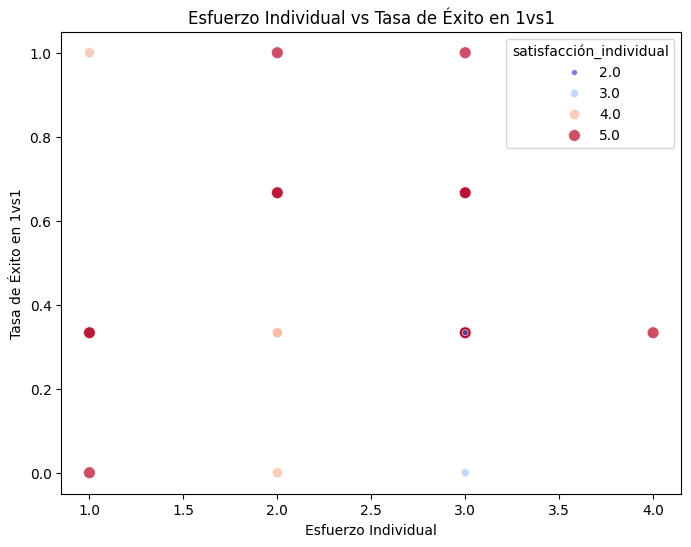

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["esfuerzo_individual"],
                y=df["retos_individuales_ganados"] / df["retos_individuales_jugados"],
                size=df["satisfacción_individual"],
                hue=df["satisfacción_individual"],
                palette="coolwarm", alpha=0.7)
plt.title("Esfuerzo Individual vs Tasa de Éxito en 1vs1")
plt.xlabel("Esfuerzo Individual")
plt.ylabel("Tasa de Éxito en 1vs1")
plt.show()

### Conclusiones

No hay una relación entre el esfuerzo y el éxito.

Las personas con una mayor tasa de éxito individual reportaron una mayor satisfacción en los retos individuales.

#Esfuerzo y Satisfacción vs Éxito grupal

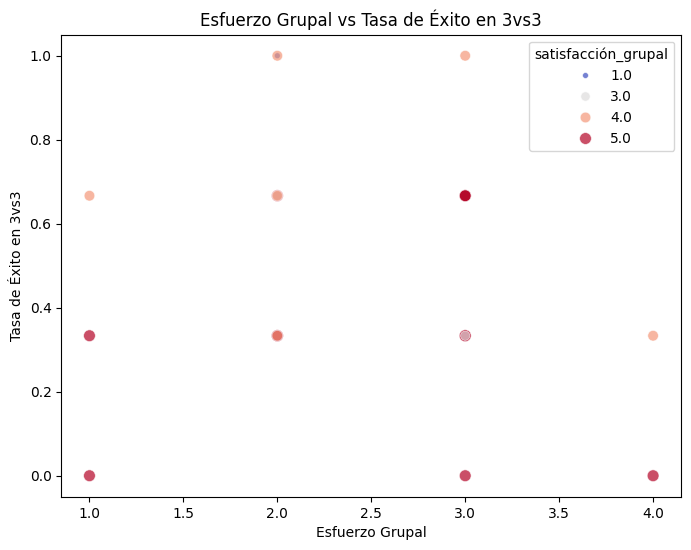

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["esfuerzo_grupal"],
                y=df["retos_grupales_ganados"] / df["retos_grupales_jugados"],
                size=df["satisfacción_grupal"],
                hue=df["satisfacción_grupal"],
                palette="coolwarm", alpha=0.7)
plt.title("Esfuerzo Grupal vs Tasa de Éxito en 3vs3")
plt.xlabel("Esfuerzo Grupal")
plt.ylabel("Tasa de Éxito en 3vs3")
plt.show()

### Conclusiones

No hay una relación clara entre la tasa de éxito, el esfuerzo ni la satisfacción.

#Mapa de correlación

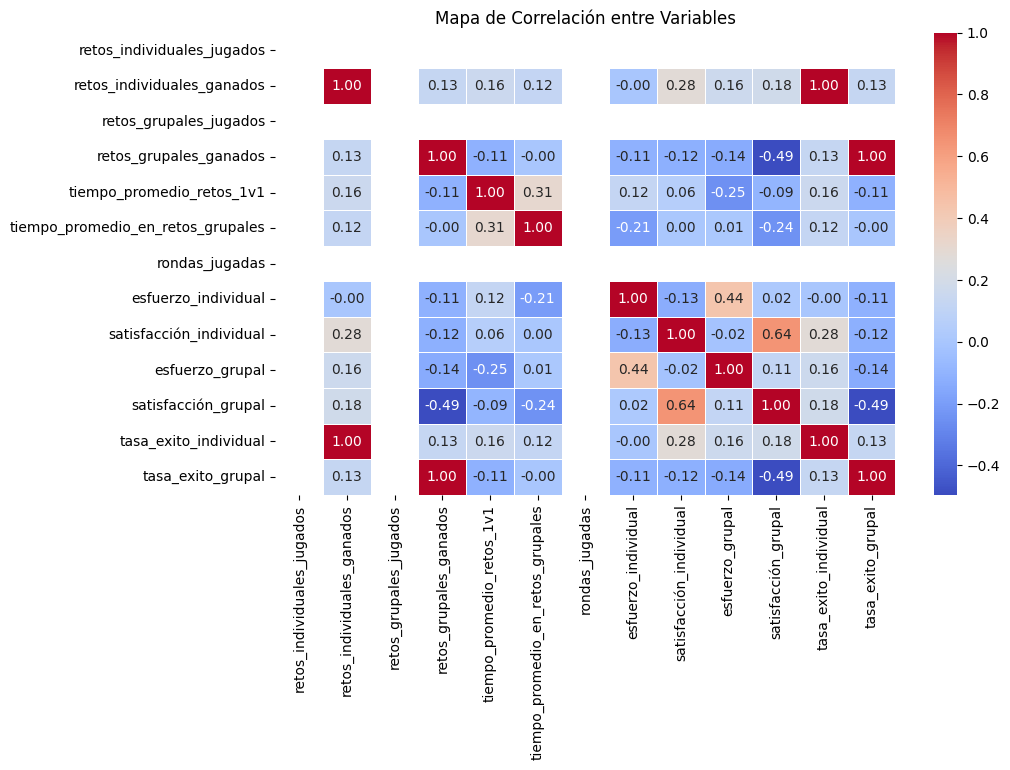

Mapa de correlación (solo variables que presentaron correlación):


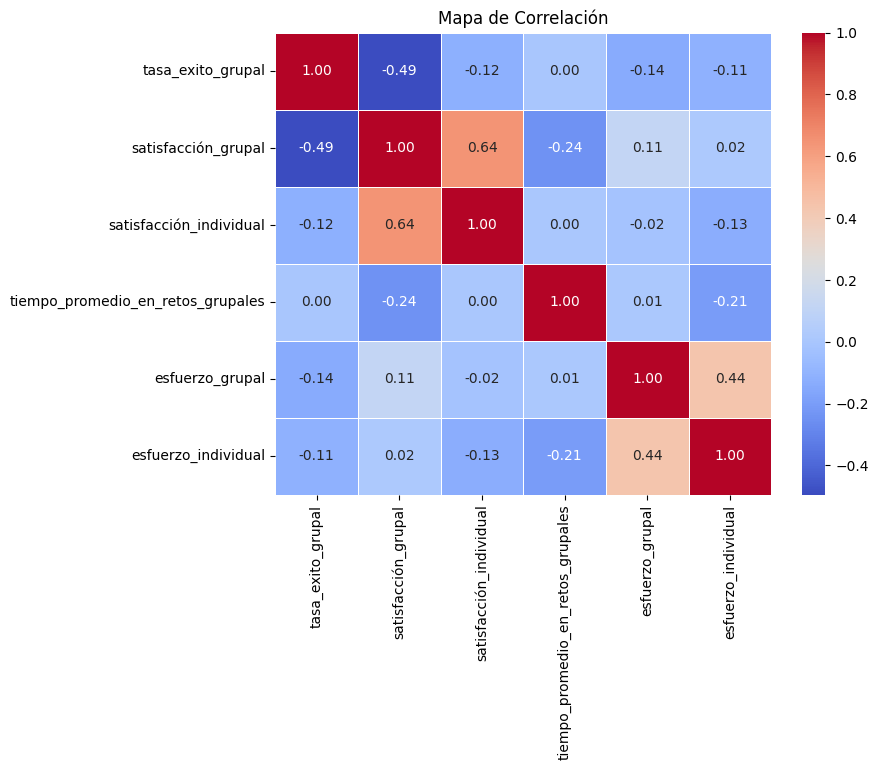

In [9]:
plt.figure(figsize=(10, 6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación entre Variables")
plt.show()

print('Mapa de correlación (solo variables que presentaron correlación):')

variables = ["tasa_exito_grupal", "satisfacción_grupal", "satisfacción_individual",
             "tiempo_promedio_en_retos_grupales", "esfuerzo_grupal", "esfuerzo_individual"]

df_corr = df[variables].corr()

plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación")
plt.show()

### Conclusiones

Los grupos con menor tasa de éxito, presentan una mayor satisfacción hacia los retos grupales.

Entre menos tiempo promedio en retos grupales, las personas reportaron una mayor satisfacción en retos grupales.

En general, hay una correlación positiva entre el esfuerzo individual y grupal, así como la satisfacción grupal e individual. Esto sugiere que los participantes mantuvieron un nivel de compromiso y disposición similar, independientemente de si enfrentaban retos individuales o grupales.

# Conclusiones finales 🧠

## Desempeño en retos individuales vs grupales

- La variabilidad en la tasa de éxito es mayor en los retos individuales que en los grupales, indicando que el desempeño individual es más irregular.

- La mayoría de participantes tiene una variabilidad media de éxito, lo que sugiere que el juego está equilibrado y permite fluctuaciones normales en el desempeño.

- No hay una relación clara entre el esfuerzo y el éxito, lo que indica que el rendimiento no depende únicamente del nivel de esfuerzo percibido.

## Estrategias y dinámicas de juego

- Los equipos aplicaron estrategias diferentes: algunos destacaron más en retos grupales, mientras que otros sobresalieron en retos individuales.

- Los retos individuales fueron en promedio más largos y con mayor variabilidad en tiempos, mientras que los retos grupales fueron más consistentes y de menor duración. Esto sugiere que el trabajo en equipo ayudó a optimizar el tiempo necesario para completar los retos.

##Satisfacción y percepción del juego

- En general, la satisfacción con los retos individuales y grupales fue similar, aunque la satisfacción grupal presentó mayor variabilidad, lo que indica experiencias diversas en equipo.

- No se observaron correlaciones fuertes entre la dificultad percibida y la satisfacción en los retos. Sin embargo, las personas con una mayor tasa de éxito en retos individuales reportaron mayor satisfacción en estos.

- Los grupos con menor tasa de éxito paradójicamente reportaron mayor satisfacción en los retos grupales.

##Factores que influyen en la satisfacción

- Se identificó que a menor tiempo promedio en los retos grupales, mayor fue la satisfacción reportada en estos.

- En términos generales, hubo una correlación positiva entre esfuerzo y satisfacción, tanto a nivel individual como grupal, lo que indica que los participantes mantuvieron un compromiso similar sin importar el tipo de reto.

#Análisis cualitativo 📌

##Respuestas abiertas de los participantes.

- Principales Tendencias: La mayoría encontró los retos fáciles, aunque algunos mencionaron que preferirían que sean más desafiantes. Se destaca la jugabilidad positiva, mencionando que fue "chévere", "divertido" y "entretenido". Los retos individuales fueron en su mayoría percibidos como accesibles.

- Sugerencia basada en esto: Se podría agregar niveles de dificultad progresivos para equilibrar la experiencia.

###Jugabilidad y Mecánicas

- "Me gustó mucho, no fue tan complejo pero fue entretenido."
- "Los retos grupales deberían tener la oportunidad de..."
- "Son sencillos ya que los elementos base para los retos están bien diseñados."

La jugabilidad es clara y atractiva, pero se podrían mejorar algunos aspectos estructurales.

- Sugerencia basada en esto: Ajustar las reglas de los retos grupales para que haya más oportunidades de cooperación y agregar mayor diversidad en los retos para mantener el interés.
